In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style="white",color_codes=True)
plt.rcParams['figure.figsize'] = (15,9.27)
# Set the font set of the latex code to computer modern
matplotlib.rcParams['mathtext.fontset'] = "cm"

In [4]:
df = pd.read_csv('data/titanic/train.csv')

titanic = df.drop('Name',axis=1)

titanic.drop(['Ticket','Cabin','Embarked','PassengerId'],axis=1,inplace=True)

def encode(x):
    if x == 'male':
        return 1
    else:
        return 0

titanic['ismale'] = titanic.Sex.apply(encode)
titanic.drop('Sex',axis=1,inplace=True)
titanic.dropna(inplace=True)

titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,ismale
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [3]:
def feature_importance(df,target,show_plot=False):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    y = df[target]
    x = df.drop(target,axis=1)
    model.fit(x,y)
    res_df = pd.DataFrame({'feature':x.columns,'importance':model.feature_importances_})
    res = res_df.sort_values('importance',ascending=False)
    res['cum_importance'] = res.importance.cumsum()
    if show_plot == True:
        plt.subplot(121)
        sns.barplot(res.feature,res.importance)
        plt.subplot(122)
        plt.plot(np.arange(1,res.shape[0]+1),res.cum_importance,linewidth=2)
    return(res)

In [11]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

In [10]:
f = 'Survived~Pclass+Age+SibSp+Parch+Fare+ismale'
y,X = patsy.dmatrices(f,titanic,return_type='dataframe')

In [19]:
print(sm.Logit(y,X).fit().summary2())

Optimization terminated successfully.
         Current function value: 0.445244
         Iterations 6
                        Results: Logit
Model:              Logit            No. Iterations:   6.0000  
Dependent Variable: Survived         Pseudo R-squared: 0.341   
Date:               2018-11-21 08:12 AIC:              649.8086
No. Observations:   714              BIC:              681.8048
Df Model:           6                Log-Likelihood:   -317.90 
Df Residuals:       707              LL-Null:          -482.26 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   5.3890    0.6037    8.9261  0.0000   4.2057   6.5723
Pclass     -1.2422    0.1632   -7.6122  0.0000  -1.5621  -0.9224
Age        -0.0440    0.0082   -5.3739  0.0000  -0.0600  -0.0279
SibSp      -0.3758   

In [22]:
model = smf.logit(formula='Survived~Pclass+Age+SibSp+Parch+Fare+ismale',data=titanic)
res = model.fit()
print(res.summary2())

Optimization terminated successfully.
         Current function value: 0.445244
         Iterations 6
                        Results: Logit
Model:              Logit            No. Iterations:   6.0000  
Dependent Variable: Survived         Pseudo R-squared: 0.341   
Date:               2018-11-21 08:18 AIC:              649.8086
No. Observations:   714              BIC:              681.8048
Df Model:           6                Log-Likelihood:   -317.90 
Df Residuals:       707              LL-Null:          -482.26 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   5.3890    0.6037    8.9261  0.0000   4.2057   6.5723
Pclass     -1.2422    0.1632   -7.6122  0.0000  -1.5621  -0.9224
Age        -0.0440    0.0082   -5.3739  0.0000  -0.0600  -0.0279
SibSp      -0.3758   

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df['ismale'] = df.Sex.apply(lambda x: 1 if x=='male' else 0)
f = 'Survived~C(Pclass)+ismale+Age+SibSp+Parch+Fare+np.log(Age)-1'
y,X = patsy.dmatrices(f,titanic,return_type='dataframe')

In [36]:
X.head()

,C(Pclass)[1],C(Pclass)[2],C(Pclass)[3],ismale,Age,SibSp,Parch,Fare,np.log(Age)
0,0.0,0.0,1.0,1.0,22.0,1.0,0.0,7.2500,3.091042
1,1.0,0.0,0.0,0.0,38.0,1.0,0.0,71.2833,3.637586
2,0.0,0.0,1.0,0.0,26.0,0.0,0.0,7.9250,3.258097
3,1.0,0.0,0.0,0.0,35.0,1.0,0.0,53.1000,3.555348
4,0.0,0.0,1.0,1.0,35.0,0.0,0.0,8.0500,3.555348


In [67]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,ismale,age<20,20<=age<28,28<=age<38,age>=38,age_cut
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,young
1,1,1,38.0,1,0,71.2833,0,0,0,0,1,middle
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,young
3,1,1,35.0,1,0,53.1000,0,0,0,1,0,middle
4,0,3,35.0,0,0,8.0500,1,0,0,1,0,middle


In [55]:
titanic

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [62]:
titanic['age<20'] = titanic.Age.map(lambda x: 1 if x<20 else 0)
titanic['20<=age<28'] = titanic.Age.map(lambda x: 1 if 20<=x<28 else 0)
titanic['28<=age<38'] = titanic.Age.map(lambda x: 1 if 28<=x<38 else 0)
titanic['age>=38'] = titanic.Age.map(lambda x: 1 if x>=38 else 0)

In [76]:
titanic['age_cut'] = pd.cut(titanic.Age,10,labels=range(1,11))

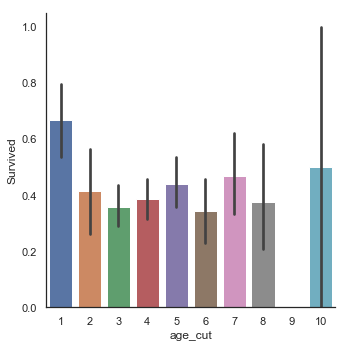

In [77]:
sns.catplot(x='age_cut',y='Survived',data=titanic,kind='bar')

In [1]:
a = np.random.randint(1,20,(10,10))